In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix

import shap
import matplotlib.pyplot as plt


from trainer import Trainer, TrainerConfig
from classifier import ClassifierConfig, OptikaClassifier, Optimizer




c:\Users\itaid\miniconda3\envs\optika\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filepath = r"C:\Users\itaid\dev\optika\haim_data\surgeries_with_measurements.csv"

In [3]:
trainer_config = TrainerConfig(filepath)

In [4]:
trainer_config.one_hot_encode_missing_feature = False
trainer_config.one_hot_encode_missing_feature

False

In [5]:
trainer = Trainer(trainer_config)

2024-11-27 16:26:41,415:INFO : File date: 2024-11-19 19:46:38
2024-11-27 16:26:41,531:INFO : Dataframe shape: (3210, 527)


c:\Users\itaid\dev\optika\trainer.py:154: DtypeWarning: Columns (17,19,21,23,51,52,53,54,55,56,58,60,61,65,71,75,78,79,80,82,83,84,85,86,89,90,94,96,99,102,105,109,110,136,137,138,139,141,143,144,145,147,148,152,159,161,163,164,165,166,167,168,169,171,174,177,179,181,187,189,190,193,194,195,216,217,222,227,229,230,245,246,256,258,259,288,293,296,298,299,320,323,325,328,330,331,332,333,361,362,363,364,365,366,367,368,389,390,392,393,394,395,396,418,419,420,421,422,423,424,425,426,439,440,441,442,443,444,445,446,447,448,478,483,498,502,509,513,514) have mixed types. Specify dtype option on import or set low_memory=False.
  self.base_df = pd.read_csv(self.config.filepath)


In [6]:
trainer.run_everything(no_training=True)

2024-11-27 16:26:41,552:INFO : Filtering
2024-11-27 16:26:41,560:INFO : Removed 1164 (36.3%) rows - all deviation features missing
2024-11-27 16:26:41,569:INFO : Removed 136 (4.2%) rows - all surgery features missing or zero
2024-11-27 16:26:41,569:INFO : Removed 29 (0.9%) rows - Kestenbaum procedure
2024-11-27 16:26:41,569:INFO : Removed 5 (0.2%) rows - Knapp procedure
2024-11-27 16:26:41,582:INFO : Filtered dataframe shape: (1876, 527)
2024-11-27 16:26:41,582:INFO : Preprocessing
2024-11-27 16:26:41,646:INFO : Filling 3801 missing values for surgery features with 0
2024-11-27 16:26:41,646:INFO : Preprocessed dataframe shape: (1876, 527)
2024-11-27 16:26:41,646:INFO : Feature engineering
2024-11-27 16:26:41,662:INFO : Present values per feature:
DeviationsBefore_Resolved_Dsc     0.231343
DeviationsBefore_Resolved_Nsc     0.474414
DeviationsBefore_Resolved_Dcc     0.548507
DeviationsBefore_Resolved_Ncc     0.617804
DCVABefore_DccLE_LogMar           0.526652
DCVABefore_DccRE_LogMar     

In [7]:
trainer.train_df.columns

Index(['Code', 'DeviationsBefore_Resolved_Dsc',
       'DeviationsBefore_Resolved_Nsc', 'DeviationsBefore_Resolved_Dcc',
       'DeviationsBefore_Resolved_Ncc', 'DCVABefore_DccLE_LogMar',
       'DCVABefore_DccRE_LogMar', 'D_SC_VABefore_DscLE_LogMar',
       'D_SC_VABefore_DscRE_LogMar', 'RefractionBefore_LE_SE',
       'RefractionBefore_RE_SE', 'LE_MR_num_mm', 'RE_MR_num_mm',
       'LE_LR_num_mm', 'RE_LR_num_mm', 'DCVABefore_DccBE_LogMar',
       'D_SC_VABefore_DscBE_LogMar', 'RefractionBefore_BE_SE', 'MinN',
       'Age_Years', 'DeviationsAfter_DaysDifference', 'BE_MR_num_mm',
       'BE_LR_num_mm', 'sc_cc', 'd_n', 'DeviationsAfter_Resolved_Dsc',
       'DeviationsAfter_Resolved_Nsc', 'DeviationsAfter_Resolved_Dcc',
       'DeviationsAfter_Resolved_Ncc', 'DeviationsDiff_Dsc',
       'DeviationsDiff_Nsc', 'DeviationsDiff_Dcc', 'DeviationsDiff_Ncc',
       'DeviationBefore', 'DeviationDiff', 'DeviationsAfter_Bracket',
       'mono/bino', 'Baseline_Haim', 'Baseline_Write', 'Baseline_Pa

## Examine regression predictions

In [8]:
# trainer.calibration_plot(name="mae - train", df=trainer.train_df)

In [9]:
# # import matplotlib.pyplot as plt

# trainer.calibration_plot(name="mae - test", df=trainer.test_df)
# # plt.plot([-40, 40], [-40, 40], "--k")

In [10]:
train_df = trainer.train_df
test_df = trainer.test_df

In [11]:
# # plt.scatter(train_df["DeviationDiff"], train_df["DeviationDiff_Pred"])
# line_lims = [-40, 40]
# ax = train_df.plot.scatter("DeviationDiff", "DeviationDiff_Pred", s=2, color='teal')
# # ax.set_title(name)
# ax.plot(line_lims, line_lims, '--r')
# ax.set_xlim([-100, 100])
# ax.set_ylim([-40, 40])
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')

In [12]:

# def print_errors_summary(train_df):
#     train_errors = train_df["DeviationDiff"] - train_df["DeviationDiff_Pred"]
#     train_mae = train_errors.abs().mean()
#     train_median_error = np.median(train_errors.abs())
#     train_p80_error = np.percentile(train_errors.abs(), 80)
#     percentile_for_under_10mm = 70.25
#     train_10mm_error_percentile = np.percentile(train_errors.abs(), percentile_for_under_10mm)
#     print(f"train mae = {train_mae:.3f} [mm]")
#     print(f"train medain error = {train_median_error:.3f} [mm]")
#     print(f"train 80% percentile = {train_p80_error:.3f} [mm]")
#     print(f"train <10mm percentile = {percentile_for_under_10mm}% for a {train_10mm_error_percentile:.3f} [mm] error")

# print_errors_summary(train_df)

In [13]:
# print_errors_summary(test_df)

In [14]:
# train_df["DeviationDiff"].hist(bins=100)


In [15]:
train_df[trainer_config.raw_targets].head()

,DeviationsAfter_Resolved_Dsc,DeviationsAfter_Resolved_Nsc,DeviationsAfter_Resolved_Dcc,DeviationsAfter_Resolved_Ncc
0,-11.0,-10.0,NaN,NaN
1,-4.0,-6.0,NaN,NaN
2,-18.0,-20.0,NaN,NaN
3,-16.0,-20.0,NaN,NaN
4,-14.0,-20.0,NaN,NaN


In [16]:
train_df[trainer_config.raw_targets].isna().sum()

DeviationsAfter_Resolved_Dsc    1895
DeviationsAfter_Resolved_Nsc    1280
DeviationsAfter_Resolved_Dcc     816
DeviationsAfter_Resolved_Ncc     775
dtype: int64

DeviationsAfter_Resolved_Dsc
DeviationsAfter_Resolved_Nsc
DeviationsAfter_Resolved_Dcc
DeviationsAfter_Resolved_Ncc


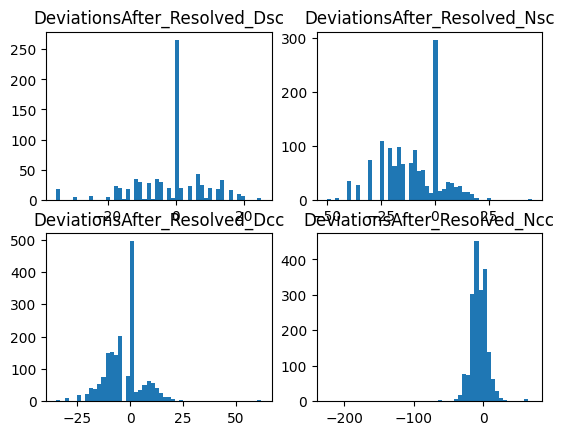

In [17]:
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
for ii, target in enumerate(list(trainer_config.raw_targets)):
    print(target)
    ax[ii].hist(train_df[target], bins=50)
    ax[ii].set_title(target)

plt.show()

In [18]:
train_df['DeviationAfter'] = train_df[trainer_config.final_before] + train_df[trainer_config.final_target]
train_df['DeviationAfter'].describe()


C:\Users\itaid\AppData\Local\Temp\ipykernel_22644\954369151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['DeviationAfter'] = train_df[trainer_config.final_before] + train_df[trainer_config.final_target]


count    2649.000000
mean       -6.670819
std        11.167648
min      -225.000000
25%       -12.000000
50%        -6.000000
75%         0.000000
max        70.000000
Name: DeviationAfter, dtype: float64

## Classifier

In [19]:
# from classifier import ClassifierConfig, OptikaClassifier

cls_config = ClassifierConfig
cls = OptikaClassifier(cls_config)

In [20]:
X_train, y_train = cls.get_X_Y(trainer.eng_df)

In [21]:
cls.train_binary_classifier(X_train, y_train)
model = cls.model

In [22]:
train_preds = model.predict(X_train)

In [23]:
# from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1116
           1       0.90      0.92      0.91      2181

    accuracy                           0.88      3297
   macro avg       0.87      0.86      0.87      3297
weighted avg       0.88      0.88      0.88      3297



In [24]:
y_train.mean()

np.float64(0.6615104640582348)

In [25]:
X_test, y_test = cls.get_X_Y(trainer.test_df)

In [26]:
test_preds = model.predict(X_test)

In [27]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       252
           1       0.90      0.91      0.91       396

    accuracy                           0.88       648
   macro avg       0.88      0.87      0.88       648
weighted avg       0.88      0.88      0.88       648



In [28]:
example = X_train[0,:]
example.shape

(7,)

In [29]:
cls_config.features

('RE_MR_num_mm',
 'LE_MR_num_mm',
 'RE_LR_num_mm',
 'LE_LR_num_mm',
 'MinN',
 'Age_Years',
 'DeviationBefore')

## Explain predictions

In [30]:
# # Create SHAP explainer
# explainer = shap.TreeExplainer(model)



In [31]:
# # Calculate SHAP values
# shap_values = explainer.shap_values(X_train)



In [32]:
# # Select a specific instance for explanation
# instance_index = 0  # Choose the first instance
# shap_values_for_instance = shap_values[instance_index, :,1]  # For class 1
# expected_value = explainer.expected_value[1]  # Base value for class 1
# original_values = X_train[instance_index]



In [33]:
# feature_names=cls_config.features
# feature_names

In [34]:
# # Create a SHAP waterfall plot
# shap.waterfall_plot(shap.Explanation(
#     values=shap_values_for_instance,
#     base_values=expected_value,
#     data=original_values,
#     feature_names=feature_names
# ))


## Calculator

In [35]:
from predictor import Predictor

# Init predictor with classifier
predictor = Predictor(model=cls)

In [ ]:
# Set input
pred_input = {
    'MinN': np.float64(0.0),
    'Age_Years': np.float64(2.495890410958904),
    'DeviationBefore': np.float64(-25.0)
    }

In [42]:
# Predict
prediction = predictor.predict_proba(Deviation=pred_input["DeviationBefore"], Gender=pred_input["MinN"], Age_Years=pred_input["Age_Years"])
prediction

LR_both_eyes - Optimal Features:
  RE_MR_num_mm: 0.0000
  LE_MR_num_mm: 0.0000
  RE_LR_num_mm: 0.5000
  LE_LR_num_mm: 0.5000

LR_both_eyes - Classifier Prediction: 0.9411
MR_both_eyes - Optimal Features:
  RE_MR_num_mm: -3.2500
  LE_MR_num_mm: -3.2500
  RE_LR_num_mm: 0.0000
  LE_LR_num_mm: 0.0000

MR_both_eyes - Classifier Prediction: 0.9277
single_eye - Optimal Features:
  RE_MR_num_mm: -3.2500
  LE_MR_num_mm: 0.0000
  RE_LR_num_mm: 0.5000
  LE_LR_num_mm: 0.0000

single_eye - Classifier Prediction: 0.9291
Optimal surgery is 'LR_both_eyes'


SurgeryPrescription(MR_both_eyes=np.float16(0.0), LR_both_eyes=np.float64(0.5), MR_single_eye=np.float16(0.0), LR_single_eye=np.float16(0.0))

In [38]:
{k:v for k,v in zip(cls.config.features,X_train[0])}

{'RE_MR_num_mm': np.float64(-3.5),
 'LE_MR_num_mm': np.float64(-3.5),
 'RE_LR_num_mm': np.float64(0.0),
 'LE_LR_num_mm': np.float64(0.0),
 'MinN': np.float64(0.0),
 'Age_Years': np.float64(2.495890410958904),
 'DeviationBefore': np.float64(-25.0)}